# EDA - Understanding what the Numeric Columns look like
### Goals:
 - Make sure there are no NA values left in the dataset
 - Look at distributions for all relavent numeric columns to understand what the skew looks like
 - Remove outlier values and account for how many rows are removed at each step to undertsand how the data is being affected
 - Log transform the numeric columns that have heavily skewed distributions to understand the trends in the data better
 - Export final csv for modeling with new understanding found from eda

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('final_tmdb.csv', keep_default_na=False)
# print columns with nan values
print(df.isna().sum())

imdb_id                 0
tmdb_id                 0
title                   0
release_date            0
genres                  0
revenue                 0
budget                  0
runtime                 0
vote_average            0
vote_count              0
top_cast                0
director                0
keywords                0
spoken_languages        0
collection_name         0
watch_providers         0
production_companies    0
certification           0
overview                0
poster_url              0
error                   0
themes                  0
profit_in_millions      0
dtype: int64


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104763 entries, 0 to 104762
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   imdb_id               104763 non-null  object 
 1   tmdb_id               104763 non-null  int64  
 2   title                 104763 non-null  object 
 3   release_date          104763 non-null  object 
 4   genres                104763 non-null  object 
 5   revenue               104763 non-null  int64  
 6   budget                104763 non-null  int64  
 7   runtime               104763 non-null  int64  
 8   vote_average          104763 non-null  float64
 9   vote_count            104763 non-null  int64  
 10  top_cast              104763 non-null  object 
 11  director              104763 non-null  object 
 12  keywords              104763 non-null  object 
 13  spoken_languages      104763 non-null  object 
 14  collection_name       104763 non-null  object 
 15  

array([[<Axes: title={'center': 'revenue'}>,
        <Axes: title={'center': 'budget'}>],
       [<Axes: title={'center': 'vote_average'}>,
        <Axes: title={'center': 'vote_count'}>],
       [<Axes: title={'center': 'runtime'}>, <Axes: >]], dtype=object)

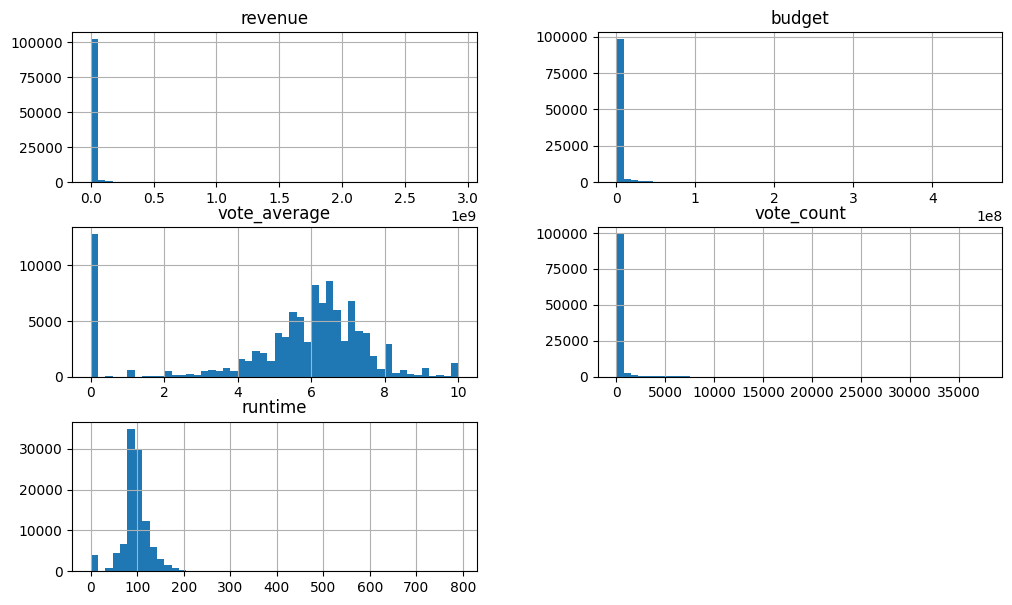

In [19]:
numeric_columns = ['revenue', 'budget', 'vote_average', 'vote_count', 'runtime']
df.hist(numeric_columns, figsize=(12,7), bins=50)

### Most numeric values have very distinct problems:
- revenue, budget, vote_average and vote_count all have an immense amount of values at 0
- runtime has a better spread but still a lot of values at zero, which doesnt make sense for movies

In [20]:
# remove where runtime is less than 45 minutes - 11 rows were removed
df = df[df['runtime'] > 45]

In [21]:
# remove rows where vote_count is less than 10
df = df[df['vote_count'] > 10]

In [22]:
# log transform numeric columns
for col in ["budget","revenue","runtime","vote_count"]:
    df[f"{col}_log"] = np.log1p(df[col])


array([[<Axes: title={'center': 'budget_log'}>,
        <Axes: title={'center': 'revenue_log'}>],
       [<Axes: title={'center': 'runtime_log'}>,
        <Axes: title={'center': 'vote_count_log'}>]], dtype=object)

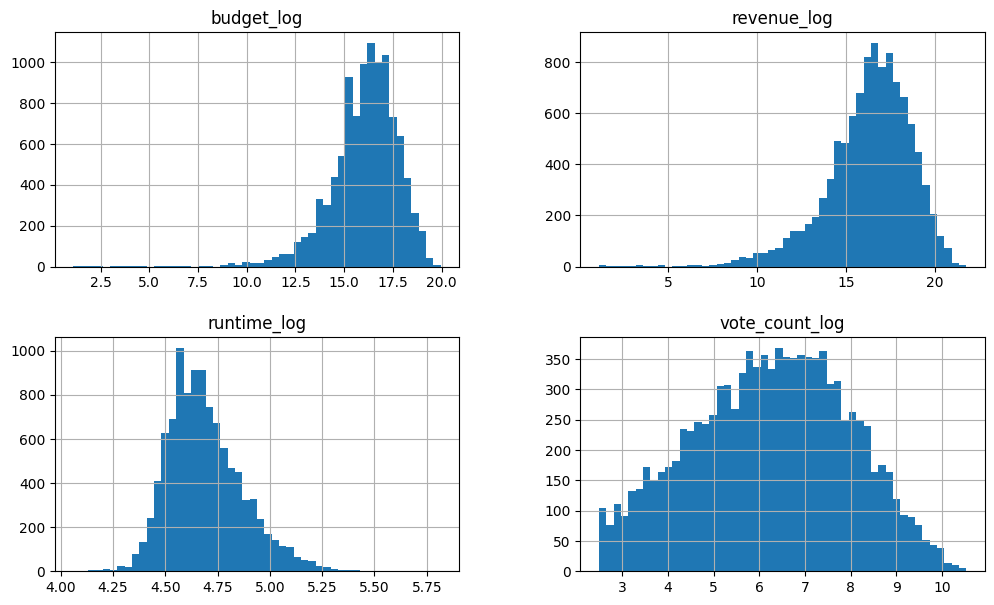

In [23]:
# create a list of log transformed columns
log_numeric_columns = [f"{col}_log" for col in ["budget","revenue","runtime","vote_count"]]

# make a copy of df for plotting
df_plot = df.copy()

# remove revenue and budget < 2.5 (log)
cols = ['revenue', 'budget']
for col in cols:
    df_plot = df_plot[df_plot[col] > 1.5]

df_plot.hist(log_numeric_columns, figsize=(12,7), bins=50)

### Findings
 - Revenue and budget move very similarly with revenue have more room for variability
 - Vote count is very sparatic and has a higher spread while runtime seems to drop off at a value pretty rapidly
 - Vote average has a huge amount of values at zero, however, most of the actual values hover betwen 6 and 8 which is expected for most movie releases

In [ ]:
# export to csv
df.to_csv('final_cleaned_tmdb.csv', index=False)